In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge

In [57]:

np.random.seed(42)
X = np.random.rand(100, 3) * [2000, 5, 50]  
y = 200 + 150 * X[:, 0] + 30000 * X[:, 1] + 1000 * X[:, 2] + np.random.randn(100) * 10

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
coefficients = model.coef_

In [63]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 1.0000


In [65]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

RMSE: 14.2035


In [67]:
feature_names = ['House Size(sqft)', 'Bedrooms', 'Age of the House'] 

feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

print(feature_importance)

                   Coefficient
House Size(sqft)    150.000529
Bedrooms          29999.849212
Age of the House   1000.137212


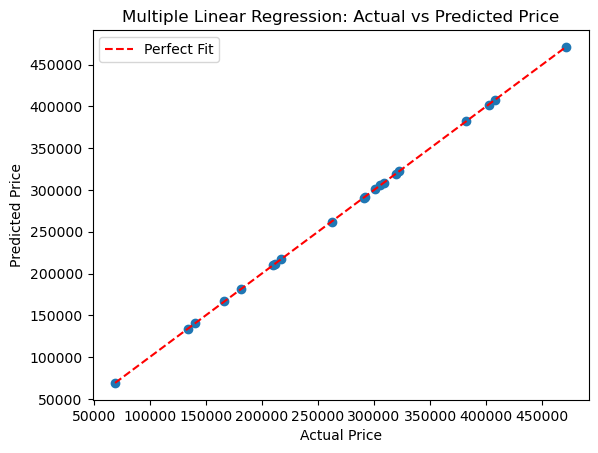

In [69]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Perfect Fit")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted Price')
plt.legend()
plt.show()

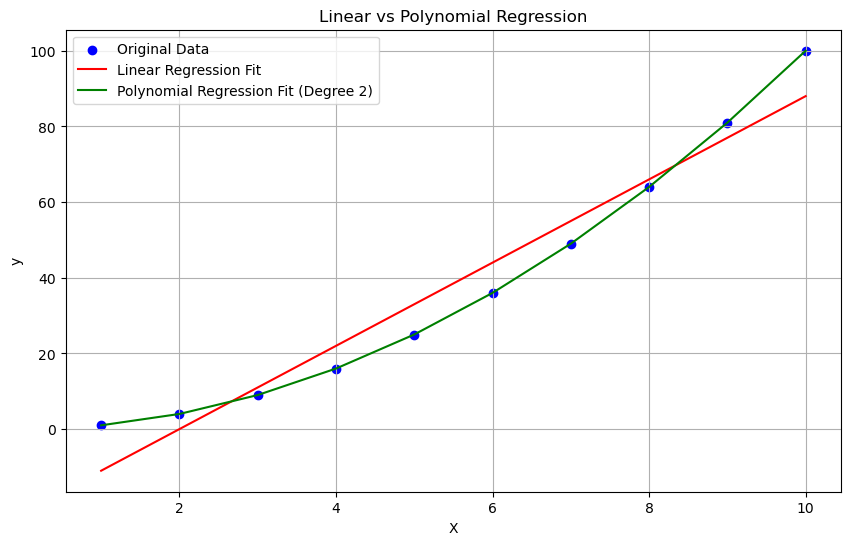

In [71]:
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])  
y = np.array([1, 4, 9, 16, 25, 36, 49, 64, 81, 100])  
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_linear_pred = linear_regressor.predict(X)

poly = PolynomialFeatures(degree=2) 
X_poly = poly.fit_transform(X) 

poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)
y_poly_pred = poly_regressor.predict(X_poly)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Original Data')


plt.plot(X, y_linear_pred, color='red', label='Linear Regression Fit')

plt.plot(X, y_poly_pred, color='green', label='Polynomial Regression Fit (Degree 2)')

plt.title('Linear vs Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


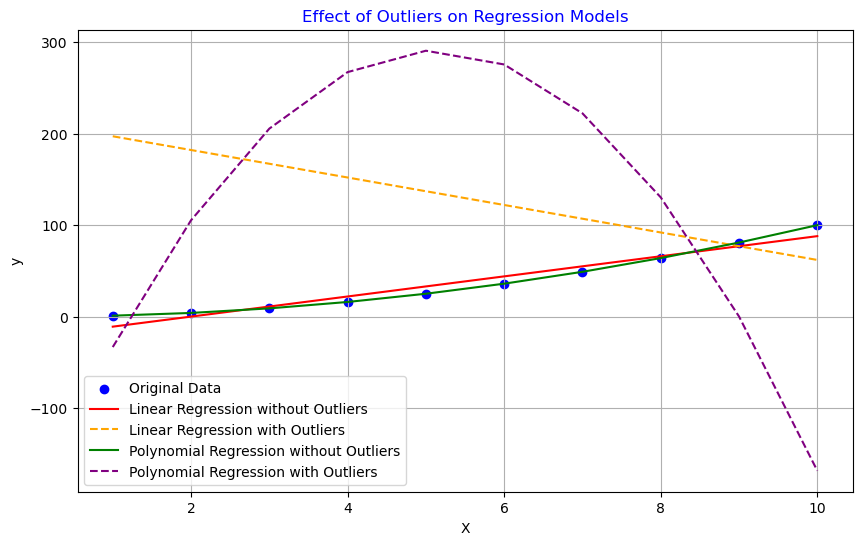

In [73]:
X_with_outliers = np.copy(X)
y_with_outliers = np.copy(y)
y_with_outliers[4] = 1500 
y_with_outliers[7] = -500  

y_linear_pred_without = linear_regression(X, y)
y_poly_pred_without = polynomial_regression(X, y)

y_linear_pred_with = linear_regression(X_with_outliers, y_with_outliers)
y_poly_pred_with = polynomial_regression(X_with_outliers, y_with_outliers)

plt.figure(figsize=(10, 6))

plt.scatter(X, y, color='blue', label='Original Data')

plt.plot(X, y_linear_pred_without, color='red', label='Linear Regression without Outliers')

plt.plot(X, y_linear_pred_with, color='orange', linestyle='--', label='Linear Regression with Outliers')

plt.plot(X, y_poly_pred_without, color='green', label='Polynomial Regression without Outliers')

plt.plot(X, y_poly_pred_with, color='purple', linestyle='--', label='Polynomial Regression with Outliers')

plt.title('Effect of Outliers on Regression Models',color='blue')
plt.xlabel('X')
plt.ylabel('y')

plt.legend()
plt.grid(True)
plt.show()



In [79]:
lasso_regressor = Lasso(alpha=0.1)  
lasso_regressor.fit(X_train, y_train)
y_lasso_pred = lasso_regressor.predict(X_test)

ridge_regressor = Ridge(alpha=0.1)  
ridge_regressor.fit(X_train, y_train)
y_ridge_pred = ridge_regressor.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_lasso_pred)  
ridge_mse = mean_squared_error(y_test, y_ridge_pred)  
print("Lasso Regression MSE:", lasso_mse)
print("Ridge Regression MSE:", ridge_mse)

Lasso Regression MSE: 200.57417789475696
Ridge Regression MSE: 669.2527294252604
